## Mod 2 Final Project: Predicting the Price of a Diamond.

data dictionary:
* price price in US dollars (\$326--\$18,823)
* carat weight of the diamond (0.2--5.01)
* cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* color diamond colour, from J (worst) to D (best)
* clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* x length in mm (0--10.74)
* y width in mm (0--58.9)
* z depth in mm (0--31.8)
* depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* table width of top of diamond relative to widest point (43--95)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics


df = pd.read_csv('./diamonds.csv', index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


(53887, 10)

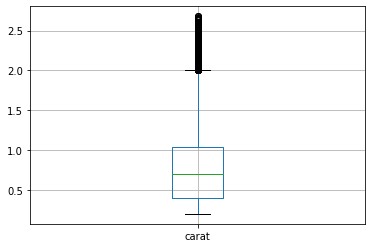

In [2]:
# remove diamonds with carat 4 standard deviations away from mean

carat_mean = df.carat.mean()
carat_std = df.carat.std()

df = df[(df.carat < (carat_mean + (4 * carat_std))) & (df.carat > (carat_mean - (4 * carat_std)))]
df.boxplot(['carat']);

df.shape

In [3]:
def calculate_rmse(X_train, X_test, y_train, y_test):
    lm = LinearRegression()
    lm = lm.fit(X_train, y_train)

    y_train_pred = lm.predict(X_train) # predictions multiplied by actual value
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    print('Training Root Mean Squared Error:' , train_rmse)

    y_pred = lm.predict(X_test)
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Testing Root Mean Squared Error:' , test_rmse)

In [4]:
df_cont = df[['carat', 'depth',	'table', 'x', 'y', 'z']]
target = df.price

X_train, X_test, y_train, y_test = train_test_split(df_cont, target, random_state=34,test_size=0.2)

calculate_rmse(X_train, X_test, y_train, y_test)

Training Root Mean Squared Error: 1452.589917565248
Testing Root Mean Squared Error: 1454.9427398770472


In [5]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(df_cont)
poly_columns = poly.get_feature_names(df_cont.columns)
df_poly = pd.DataFrame(poly_data, columns=poly_columns)
df_poly.head()

X_train, X_test, y_train, y_test = train_test_split(df_poly, target, random_state=34,test_size=0.2)

calculate_rmse(X_train, X_test, y_train, y_test)


Training Root Mean Squared Error: 1386.0558094156422
Testing Root Mean Squared Error: 1935.3005119898032


In [6]:
df = pd.get_dummies(df, columns=['cut', 'clarity', 'color'])

# remove x y z data for bc they are colinear
df.drop(columns=['x', 'y', 'z'], inplace=True)

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2

X = df.drop(['price'], axis=1)  #independent columns
y = target  #target column i.e price range

# use f-score feature_selection f_regression
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe columns

print(featureScores.nlargest(15, 'Score'))  #print 15 best features


Specs         Score
22       color_J  18873.657559
11   clarity_SI2  18140.426051
9     clarity_IF  17589.854955
21       color_I  16476.612168
16       color_D  16452.629923
15  clarity_VVS2  16263.805632
13   clarity_VS2  15662.721065
20       color_H  15536.255470
10   clarity_SI1  15336.163443
14  clarity_VVS1  15277.354430
12   clarity_VS1  14900.451935
18       color_F  14825.423804
17       color_E  14600.245627
19       color_G  14294.674645
0          carat  14239.086184


In [9]:
feature_selected_df =  df[['carat',
'clarity_SI2',
'table',
'color_E',
'cut_Ideal',
'color_I',
'cut_Premium',
'clarity_VVS1',
'color_J',
'color_D',
'color_H',
'clarity_VVS2',
'clarity_IF',
'color_F',
'cut_Fair']]

X_train, X_test, y_train, y_test = train_test_split(feature_selected_df, target, random_state=34,test_size=0.2)

calculate_rmse(X_train, X_test, y_train, y_test)

Training Root Mean Squared Error: 1243.5083659785682
Testing Root Mean Squared Error: 1244.4503857632928


In [11]:
# now use chi squared scoring function
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe columns

print(featureScores.nlargest(15, 'Score'))  #print 15 best features

Specs         Score
22       color_J  18873.657559
11   clarity_SI2  18140.426051
9     clarity_IF  17589.854955
21       color_I  16476.612168
16       color_D  16452.629923
15  clarity_VVS2  16263.805632
13   clarity_VS2  15662.721065
20       color_H  15536.255470
10   clarity_SI1  15336.163443
14  clarity_VVS1  15277.354430
12   clarity_VS1  14900.451935
18       color_F  14825.423804
17       color_E  14600.245627
19       color_G  14294.674645
0          carat  14239.086184


In [12]:
feature_selected_df =  df[['color_J',
    'clarity_SI2',
    'clarity_IF',
    'color_I',
    'color_D',
    'clarity_VVS2',
    'clarity_VS2',
    'color_H',
    'clarity_SI1',
    'clarity_VVS1',
    'clarity_VS1',
    'color_F',
    'color_E',
    'color_G',
    'carat']]

X_train, X_test, y_train, y_test = train_test_split(feature_selected_df, target, random_state=34,test_size=0.2)

calculate_rmse(X_train, X_test, y_train, y_test)


Training Root Mean Squared Error: 1145.6011338817127
Testing Root Mean Squared Error: 1143.0533608583735
